In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import warnings

warnings.filterwarnings('ignore')

In [12]:
data = '../input/supermarket-sales/supermarket_sales - Sheet1.csv'

df = pd.read_csv(data)

In [13]:
df.shape

(1000, 17)

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
col_names = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
for col in col_names:
    print(df[col].value_counts())  

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64
A    340
B    332
C    328
Name: Branch, dtype: int64
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
83.77    3
39.62    2
24.74    2
19.15    2
73.47    2
        ..
57.95    1
47.65    1
42.82    1
48.09    1
88.34    1
Name: Unit price, Length: 943, dtype: int64
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64
10.3260    2
4

In [17]:
print(df['Branch'].value_counts()) 

A    340
B    332
C    328
Name: Branch, dtype: int64


In [18]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [19]:
X = df.drop(['Branch'], axis=1)

y = df['Branch']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
X_train.shape, X_test.shape

((670, 16), (330, 16))

In [22]:
X_train.dtypes

Invoice ID                  object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [23]:
X_train.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
703,729-06-2010,Mandalay,Member,Male,Health and beauty,80.47,9,36.2115,760.4415,1/6/2019,11:18,Cash,724.23,4.761905,36.2115,9.2
311,181-94-6432,Naypyitaw,Member,Male,Fashion accessories,69.33,2,6.9330,145.5930,2/5/2019,19:05,Ewallet,138.66,4.761905,6.9330,9.7
722,776-68-1096,Mandalay,Normal,Male,Home and lifestyle,44.12,3,6.6180,138.9780,3/18/2019,13:45,Credit card,132.36,4.761905,6.6180,7.9
629,308-39-1707,Yangon,Normal,Female,Fashion accessories,12.09,1,0.6045,12.6945,1/26/2019,18:19,Credit card,12.09,4.761905,0.6045,8.2
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [24]:
import category_encoders as ce

In [27]:
encoder = ce.OrdinalEncoder(cols=['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [28]:
X_train.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
703,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
311,2,2,1,1,2,2,2,2,2,2,2,2,2,1,2,2
722,3,1,2,1,3,3,3,3,3,3,3,3,3,1,3,3
629,4,3,2,2,2,4,4,4,4,4,4,3,4,1,4,4
0,5,3,1,2,1,5,5,5,5,5,5,2,5,1,5,5


In [29]:
X_test.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
521,-1.0,2,1,2,3,-1.0,9,-1.0,-1.0,62,132.0,1,-1.0,1,-1.0,6
737,-1.0,2,2,1,5,-1.0,7,-1.0,-1.0,52,-1.0,2,-1.0,1,-1.0,51
740,-1.0,2,2,1,3,-1.0,5,-1.0,-1.0,63,-1.0,1,-1.0,1,-1.0,29
660,-1.0,1,2,2,6,-1.0,3,-1.0,-1.0,43,-1.0,1,-1.0,1,-1.0,53
411,-1.0,1,2,1,6,-1.0,2,-1.0,-1.0,29,237.0,2,-1.0,1,-1.0,39


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
y_pred_gini = clf_gini.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [36]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['B', 'C', 'B', 'A', 'A', 'C', 'B', 'A', 'B', 'B', 'C', 'C', 'C',
       'A', 'A', 'C', 'B', 'A', 'C', 'C', 'C', 'B', 'B', 'A', 'C', 'A',
       'C', 'C', 'A', 'A', 'B', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'C',
       'C', 'A', 'B', 'C', 'B', 'A', 'C', 'B', 'C', 'B', 'A', 'B', 'C',
       'B', 'A', 'B', 'C', 'B', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'C',
       'A', 'A', 'A', 'A', 'A', 'A', 'B', 'C', 'A', 'A', 'C', 'B', 'C',
       'A', 'B', 'B', 'C', 'A', 'B', 'A', 'A', 'C', 'B', 'A', 'C', 'A',
       'A', 'B', 'B', 'B', 'A', 'C', 'C', 'B', 'A', 'B', 'A', 'C', 'B',
       'C', 'A', 'A', 'C', 'C', 'A', 'C', 'A', 'B', 'B', 'B', 'C', 'B',
       'A', 'A', 'C', 'A', 'A', 'A', 'C', 'A', 'B', 'A', 'B', 'A', 'A',
       'A', 'A', 'C', 'A', 'C', 'B', 'C', 'C', 'A', 'B', 'C', 'A', 'B',
       'B', 'A', 'C', 'B', 'C', 'B', 'A', 'C', 'C', 'B', 'A', 'C', 'C',
       'B', 'A', 'A', 'C', 'C', 'C', 'B', 'C', 'A', 'A', 'A', 'C', 'A',
       'B', 'B', 'C', 'A', 'C', 'A', 'C', 'B', 'C', 'C', 'A', 'A

In [38]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [37]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.6, 0.8333333333333334, 'X[1] <= 2.5\ngini = 0.666\nsamples = 670\nvalue = [232, 226, 212]'),
 Text(0.4, 0.5, 'X[1] <= 1.5\ngini = 0.499\nsamples = 438\nvalue = [0, 226, 212]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 226\nvalue = [0, 226, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 212\nvalue = [0, 0, 212]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 232\nvalue = [232, 0, 0]')]

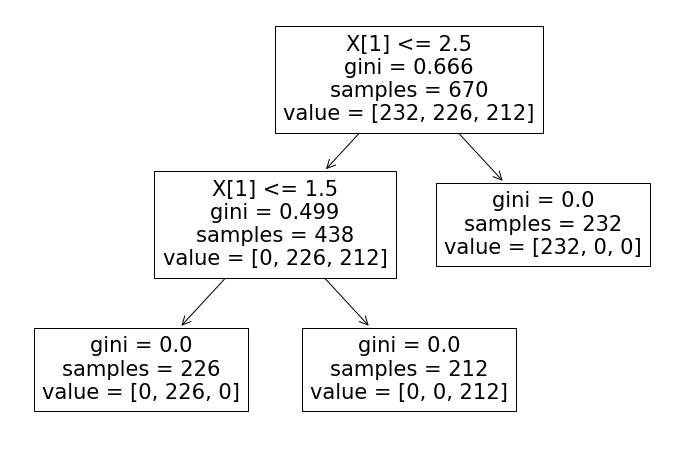

In [39]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [41]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

KeyError: 2

In [47]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[108   0   0]
 [  0 106   0]
 [  0   0 116]]


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       108
           B       1.00      1.00      1.00       106
           C       1.00      1.00      1.00       116

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

